# Loading Graphs in NetworkX

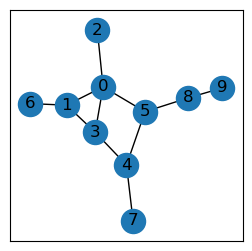

In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_edges_from([(0, 1),(0, 2),
                   (0, 3),(0, 5),
                   (1, 3),(1, 6),
                   (3, 4),(4, 5),
                   (4, 7),(5, 8),
                   (8, 9)])
                   
plt.figure(figsize=(3,3))
nx.draw_networkx(G1)

### Adjacency List

인접 리스트(adjacency list)는 그래프 이론에서 그래프를 표현하기 위한 방법 중 하나이다. 

그래프의 한 꼭짓점에서 연결되어 있는 꼭짓점들을 하나의 연결 리스트로 표현하는 방법이다. 인접 행렬에 비하여 변이 희소한 그래프에 효율적이다.

출처: 위키

In [7]:
# !type는 파일 내용을 보여준다.(리눅스에선 !cat) / 느낌표(!)는 셸 함수를 사용하기 위한 아이파이썬(IPython) 매직 명령
!type G_adjlist.txt

# 노드 0이 1,2,3,5와 연결, 1이 3,6과 연결(위 그림과 동일)

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [8]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

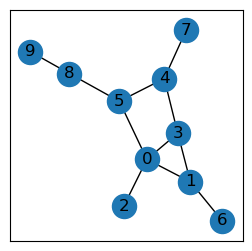

In [28]:
# 위에서 txt로 인접리스트를 읽어온걸 그릴 수 있다
plt.figure(figsize=(3,3))
nx.draw_networkx(G2)

### Adjacency Matrix

그래프 이론에서 인접 행렬(adjacency matrix)은 그래프에서 어느 꼭짓점들이 변으로 연결되었는지 나타내는 정사각 행렬이다.

출처: 위키

In [11]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [12]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

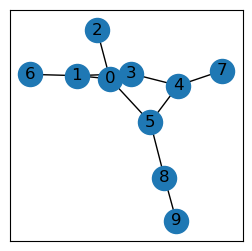

In [14]:
plt.figure(figsize=(3,3))
nx.draw_networkx(G3)

### Edgelist

An edge list is a data structure used to represent a graph as a list of its edges. 

An (unweighted) edge is defined by its start and end vertex, so each edge may be represented by two numbers.

The entire edge list may be represented as a two-column matrix.

In [30]:
!type G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [31]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])
G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

In [48]:
# edge의 weight가져오기
weight = nx.get_edge_attributes(G4, 'Weight')
# Node의 위치 저장
pos = nx.spring_layout(G4)

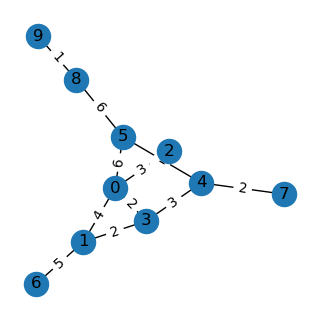

In [60]:
plt.figure(figsize=(3,3))
nx.draw(G4, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G4,pos=pos,edge_labels=weight);

### Pandas DataFrame

In [62]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [63]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Example

In [73]:
# 노드,노드,결과, timestamp 순의 txt파일이다
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [74]:
chess.is_directed(), chess.is_multigraph()

(True, True)

In [75]:
list(chess.edges(data=True))[0:10]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0})]

In [82]:
# degree로 몇번 나왔는지 count 가능
games_played = chess.degree()
list(games_played)[0:10]

[('1', 48),
 ('2', 112),
 ('3', 85),
 ('4', 12),
 ('5', 18),
 ('6', 95),
 ('7', 9),
 ('8', 20),
 ('9', 142),
 ('10', 4)]

In [83]:
max_value = max(dict(games_played).values())
max_key, = [i for i in dict(games_played).keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

player 461
280 games


In [84]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

,white,black,outcome
0,1,2,"{'outcome': 0, 'timestamp': 885635999.999997}"
1,1,3,"{'outcome': 0, 'timestamp': 885635999.999997}"
2,1,4,"{'outcome': 0, 'timestamp': 885635999.999997}"
3,1,5,"{'outcome': 1, 'timestamp': 885635999.999997}"
4,1,6,"{'outcome': 0, 'timestamp': 885635999.999997}"


In [85]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


In [86]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

,outcome
1,1.0
100,1.0
1000,-1.0
1002,1.0
1003,3.0


In [19]:
win_count.nlargest(5, 'outcome')

,outcome
461,46.0
371,31.0
275,30.0
98,30.0
623,29.0


속성 접근하기

* 딕셔너리처럼 사용하면 된다

In [87]:
import networkx as nx
 
G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.nodes['A']['role'] = 'team member'
G.nodes['B']['role'] = 'engineer'

In [101]:
G["A"]["B"][0]["relation"]

'friend'

In [105]:
G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.nodes['A']['role'] = 'team member'
G.nodes['B']['role'] = 'engineer'

G.nodes(data=True)

NodeDataView({'A': {'role': 'team member'}, 'B': {'role': 'engineer'}, 'C': {}})